#Rafael Augusto Moraes Monteiro - 4 termo CD - FATEC OURINHOS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time


#Algoritmo Genético (Evolucionário)

A melhor rota encontrada: [3 6 8 9 1 5 7 2 4 0]
A distância total: 57.89


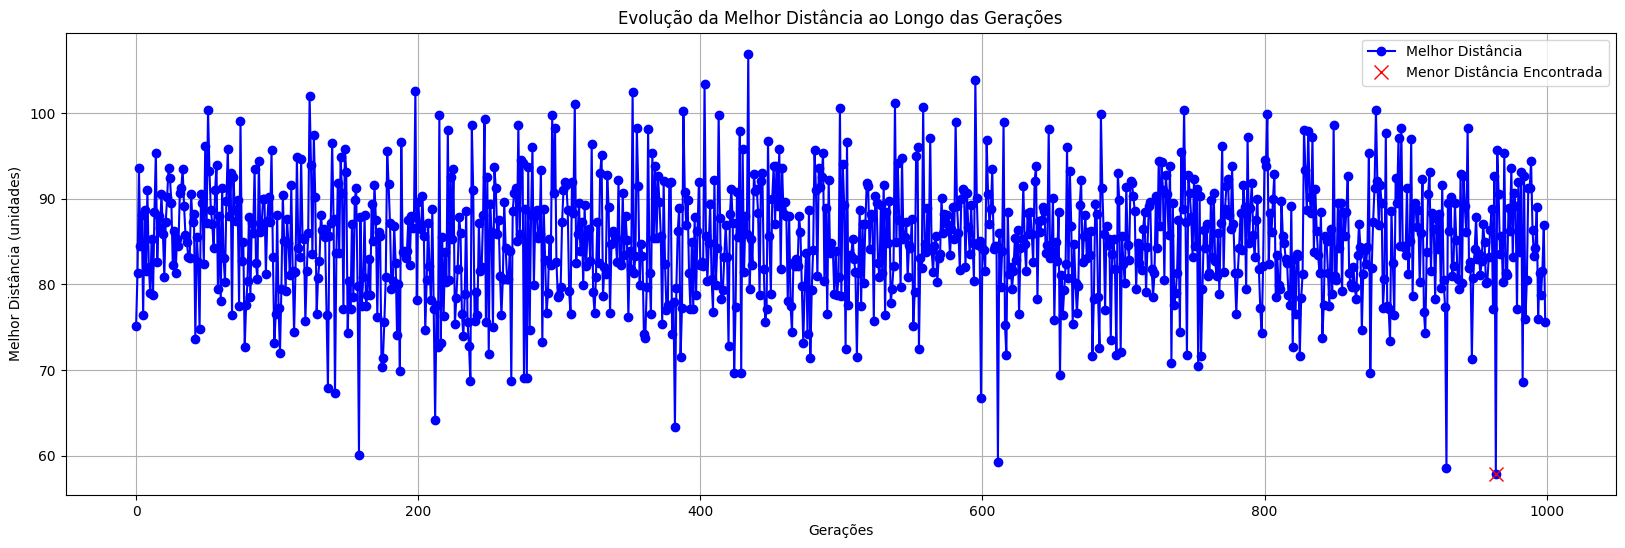

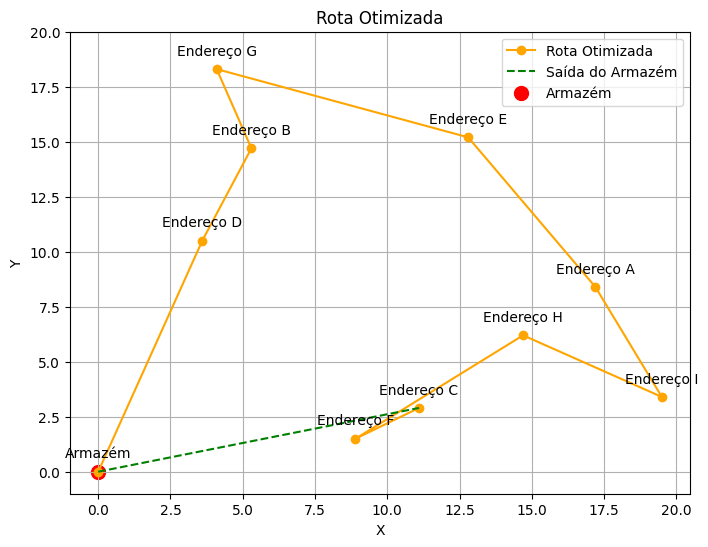

In [ ]:
#TROCAR ESSA PARTE DO CÓDIGO PARA TROCAR OS AS COORDENADAS

# Definindo os endereços como coordenadas (x, y) e seus nomes
enderecos = np.array([
    [0, 0],       # Armazém
    [17.2, 8.4],  # Endereço A
    [5.3, 14.7],  # Endereço B
    [11.1, 2.9],  # Endereço C
    [3.6, 10.5],  # Endereço D
    [12.8, 15.2], # Endereço E
    [8.9, 1.5],   # Endereço F
    [4.1, 18.3],  # Endereço G
    [14.7, 6.2],  # Endereço H
    [19.5, 3.4]   # Endereço I
])

nomes_enderecos = ['Armazém', 'Endereço A', 'Endereço B', 'Endereço C', 'Endereço D',
                   'Endereço E', 'Endereço F', 'Endereço G', 'Endereço H', 'Endereço I']
#__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________




# Função para calcular a distância total da rota
def calcular_distancia(rota):
    distancia = 0
    for i in range(len(rota) - 1):
        distancia += np.linalg.norm(enderecos[rota[i]] - enderecos[rota[i + 1]])
    # Adiciona a distância de volta ao armazém
    distancia += np.linalg.norm(enderecos[rota[-1]] - enderecos[0])
    return distancia

# Algoritmo Genético
def algoritmo_genetico(pop_size=100, generations=1000):
    populacao = [np.random.permutation(range(1, len(enderecos))) for _ in range(pop_size)]
    fitness_history = []

    melhor_rota_global = None
    menor_distancia_global = float('inf')

    for gen in range(generations):
        fitness_scores = np.array([calcular_distancia(ind) for ind in populacao])
        melhor_distancia = np.min(fitness_scores)
        fitness_history.append(melhor_distancia)

        # Atualiza a melhor rota global se necessário
        melhor_rota_atual = populacao[np.argmin(fitness_scores)]
        if melhor_distancia < menor_distancia_global:
            menor_distancia_global = melhor_distancia
            melhor_rota_global = melhor_rota_atual

        # Seleciona os melhores indivíduos
        indices = np.argsort(fitness_scores)
        populacao = [populacao[i] for i in indices[:pop_size // 2]]

        new_population = []
        while len(new_population) < pop_size:
            parent1, parent2 = np.random.choice(len(populacao), 2, replace=False)
            parent1 = populacao[parent1]
            parent2 = populacao[parent2]
            crossover_point = np.random.randint(1, len(parent1) - 1)
            child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))

            # Garantir que o filho seja uma permutação válida
            child = np.unique(child, return_index=True)[1]
            child = np.array([x for x in range(1, len(enderecos)) if x not in child.tolist()] + child.tolist())

            if np.random.rand() < 0.1:  # 10% chance de mutação
                swap_indices = np.random.choice(range(len(child)), 2, replace=False)
                child[swap_indices[0]], child[swap_indices[1]] = child[swap_indices[1]], child[swap_indices[0]]

            new_population.append(child)

        populacao = new_population

    return melhor_rota_global, menor_distancia_global, fitness_history

# Executar o algoritmo genético
melhor_rota, melhor_distancia, fitness_history = algoritmo_genetico()

# Exibir a melhor rota encontrada
print(f'A melhor rota encontrada: {melhor_rota}')
print(f'A distância total: {melhor_distancia:.2f}')

# Gráfico da evolução da fitness
plt.figure(figsize=(20, 6))
plt.plot(fitness_history, marker='o', color='blue', label='Melhor Distância')

# Marcar a menor distância encontrada com um "X"
min_distance = min(fitness_history)
min_index = fitness_history.index(min_distance)
plt.plot(min_index, min_distance, 'rx', markersize=10, label='Menor Distância Encontrada')

plt.title('Evolução da Melhor Distância ao Longo das Gerações')
plt.xlabel('Gerações')
plt.ylabel('Melhor Distância (unidades)')
plt.grid()
plt.legend()
plt.show()

# Gráfico da rota otimizada
plt.figure(figsize=(8, 6))

# Plotando a rota otimizada (laranja) sem o último ponto de volta ao armazém
plt.plot(enderecos[melhor_rota, 0], enderecos[melhor_rota, 1], marker='o', linestyle='-', color='orange', label='Rota Otimizada')

# Plotando a linha de saída do armazém (verde tracejada)
plt.plot([enderecos[0, 0], enderecos[melhor_rota[0], 0]],
         [enderecos[0, 1], enderecos[melhor_rota[0], 1]],
         linestyle='--', color='green', label='Saída do Armazém')

plt.title('Rota Otimizada')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.xlim()
plt.ylim(-1, 20)

# Adicionando rótulos aos pontos
for i, nome in enumerate(nomes_enderecos):
    plt.annotate(nome, (enderecos[i, 0], enderecos[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Destacar o armazém com um ponto vermelho maior
plt.scatter(enderecos[0, 0], enderecos[0, 1], color='red', s=100, label='Armazém')  # s=100 aumenta o tamanho do marcador

plt.legend()
plt.show()



##  **Resolução utilizando um otimizador** (Simulated Annealing)


A melhor rota encontrada: [6 3 8 9 1 5 7 2 4]
A distância total: 55.31


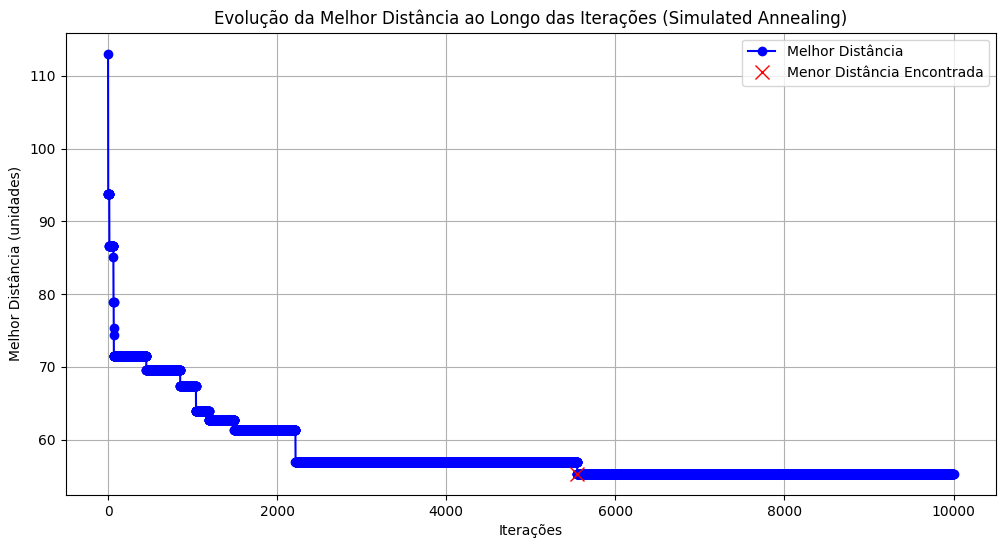

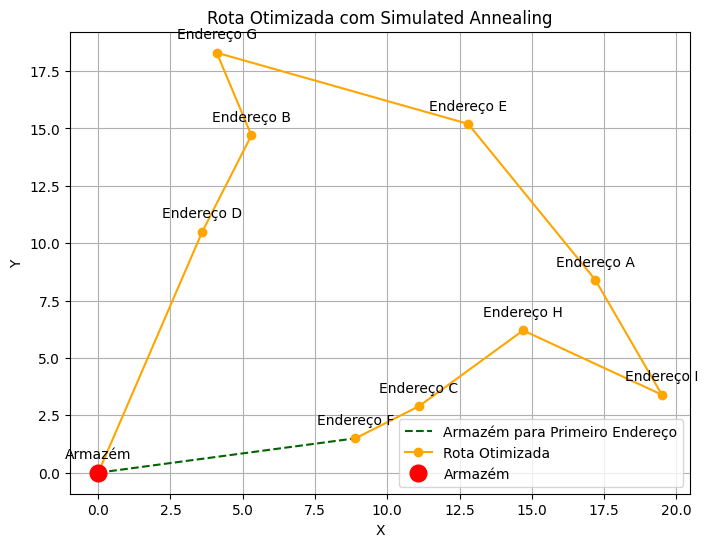

In [ ]:
#TROCAR ESSA PARTE DO CÓDIGO PARA TROCAR OS AS COORDENADAS

# Definindo os endereços como coordenadas (x, y) e seus nomes
enderecos = np.array([
    [0, 0],       # Armazém
    [17.2, 8.4],  # Endereço A
    [5.3, 14.7],  # Endereço B
    [11.1, 2.9],  # Endereço C
    [3.6, 10.5],  # Endereço D
    [12.8, 15.2], # Endereço E
    [8.9, 1.5],   # Endereço F
    [4.1, 18.3],  # Endereço G
    [14.7, 6.2],  # Endereço H
    [19.5, 3.4]   # Endereço I
])

nomes_enderecos = ['Armazém', 'Endereço A', 'Endereço B', 'Endereço C', 'Endereço D',
                   'Endereço E', 'Endereço F', 'Endereço G', 'Endereço H', 'Endereço I']


#__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________





# Função para calcular a distância total da rota
def calcular_distancia(rota):
    distancia = 0
    for i in range(len(rota) - 1):
        distancia += np.linalg.norm(enderecos[rota[i]] - enderecos[rota[i + 1]])
    # Adiciona a distância de volta ao armazém
    distancia += np.linalg.norm(enderecos[rota[-1]] - enderecos[0])
    return distancia

# Simulated Annealing
def simulated_annealing(initial_route, initial_temp, cooling_rate, max_iter):
    current_route = initial_route
    current_distance = calcular_distancia(current_route)
    best_route = np.copy(current_route)
    best_distance = current_distance

    temp = initial_temp
    distance_history = [current_distance]  # Para armazenar a evolução das distâncias

    for _ in range(max_iter):
        # Gera uma nova rota
        new_route = np.copy(current_route)
        # Realiza uma troca aleatória
        i, j = np.random.choice(len(new_route), 2, replace=False)
        new_route[i], new_route[j] = new_route[j], new_route[i]

        new_distance = calcular_distancia(new_route)

        # Aceita a nova rota com base na temperatura
        if (new_distance < current_distance or
            np.random.rand() < np.exp((current_distance - new_distance) / temp)):
            current_route = new_route
            current_distance = new_distance

            # Atualiza a melhor rota
            if current_distance < best_distance:
                best_route = np.copy(current_route)
                best_distance = current_distance

        # Armazena a distância atual
        distance_history.append(best_distance)

        # Resfria a temperatura
        temp *= cooling_rate

    return best_route, best_distance, distance_history

# Configurações ajustadas para Simulated Annealing
initial_route = np.random.permutation(range(1, len(enderecos)))  # Rota inicial aleatória
best_route, best_distance, distance_history = simulated_annealing(
    initial_route, initial_temp=2000, cooling_rate=0.999, max_iter=10000
)

# Exibir a melhor rota encontrada
print(f'A melhor rota encontrada: {best_route}')
print(f'A distância total: {best_distance:.2f}')

# Gráfico da evolução da melhor distância
plt.figure(figsize=(12, 6))
plt.plot(distance_history, marker='o', color='blue', label='Melhor Distância')

# Marcar a menor distância encontrada com um "X"
min_distance = min(distance_history)
min_index = distance_history.index(min_distance)
plt.plot(min_index, min_distance, 'rx', markersize=10, label='Menor Distância Encontrada')

plt.title('Evolução da Melhor Distância ao Longo das Iterações (Simulated Annealing)')
plt.xlabel('Iterações')
plt.ylabel('Melhor Distância (unidades)')
plt.grid()
plt.legend()
plt.show()

# Gráfico da rota otimizada
plt.figure(figsize=(8, 6))

# Traçar a ida do armazém ao primeiro endereço em verde escuro (tracejado)
plt.plot([enderecos[0, 0], enderecos[best_route[0], 0]], [enderecos[0, 1], enderecos[best_route[0], 1]],
         color='darkgreen', linestyle='--', label='Armazém para Primeiro Endereço')

# Traçar a rota otimizada entre os endereços (em laranja sólido)
plt.plot(enderecos[best_route, 0], enderecos[best_route, 1], marker='o', linestyle='-', color='orange', label='Rota Otimizada')

# Traçar a volta do último endereço ao armazém em laranja (sólido)
plt.plot([enderecos[best_route[-1], 0], enderecos[0, 0]], [enderecos[best_route[-1], 1], enderecos[0, 1]],
         color='orange', linestyle='-')

# Adicionar o armazém como uma bola vermelha maior
plt.plot(enderecos[0, 0], enderecos[0, 1], 'ro', markersize=12, label='Armazém')  # Aqui está a alteração

plt.title('Rota Otimizada com Simulated Annealing')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.xlim()
plt.ylim()

# Adicionando rótulos aos pontos
for i, nome in enumerate(nomes_enderecos):
    plt.annotate(nome, (enderecos[i, 0], enderecos[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Adicionando a legenda
plt.legend()

plt.show()



#Algoritmo Genético (Evolucionário) - NOVA ROTA

A melhor rota encontrada: [ 2  4 10  7  5  9 11  3  6  1  8  0]
A distância total: 181.53


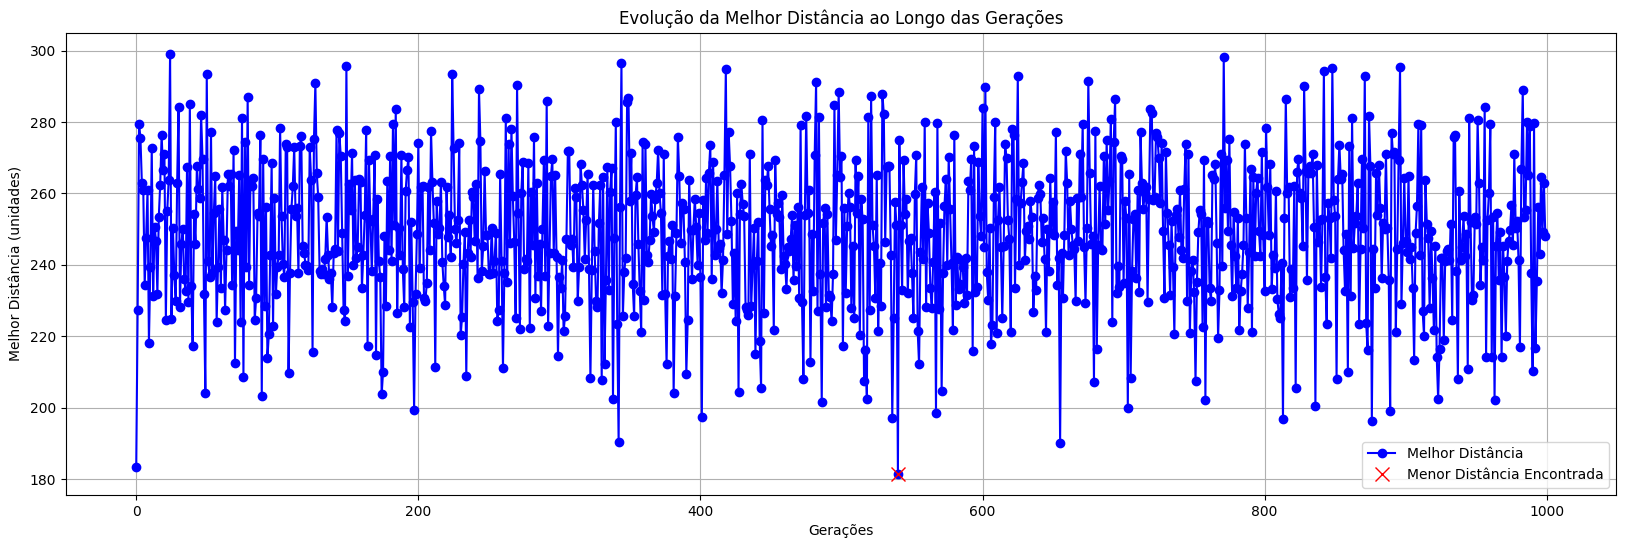

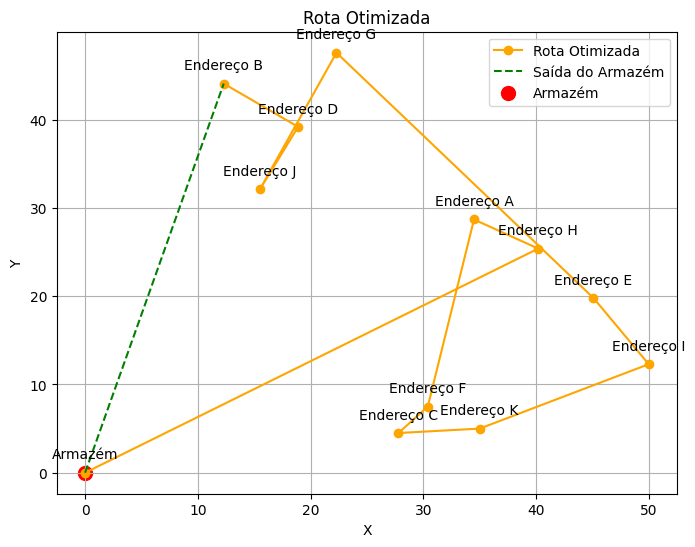

In [ ]:
#TROCAR ESSA PARTE DO CÓDIGO PARA TROCAR OS AS COORDENADAS

# Definindo os endereços como coordenadas (x, y) e seus nomes
enderecos = np.array([
           [0, 0],        # Armazém
           [34.5, 28.7],  # Endereço A
           [12.3, 44.1],  # Endereço B
           [27.8, 4.5],   # Endereço C
           [18.9, 39.2],  # Endereço D
           [45.1, 19.8],  # Endereço E
           [30.4, 7.5],   # Endereço F
           [22.3, 47.6],  # Endereço G
           [40.2, 25.4],  # Endereço H
           [50.0, 12.3],  # Endereço I
           [15.5, 32.1],  # Endereço J (nova coordenada)
           [35.0, 5.0]    # Endereço K
       ])


nomes_enderecos = ['Armazém', 'Endereço A', 'Endereço B', 'Endereço C', 'Endereço D', 'Endereço E', 'Endereço F', 'Endereço G', 'Endereço H', 'Endereço I', 'Endereço J', 'Endereço K']

#__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________




# Função para calcular a distância total da rota
def calcular_distancia(rota):
    distancia = 0
    for i in range(len(rota) - 1):
        distancia += np.linalg.norm(enderecos[rota[i]] - enderecos[rota[i + 1]])
    # Adiciona a distância de volta ao armazém
    distancia += np.linalg.norm(enderecos[rota[-1]] - enderecos[0])
    return distancia

# Algoritmo Genético
def algoritmo_genetico(pop_size=100, generations=1000):
    populacao = [np.random.permutation(range(1, len(enderecos))) for _ in range(pop_size)]
    fitness_history = []

    melhor_rota_global = None
    menor_distancia_global = float('inf')

    for gen in range(generations):
        fitness_scores = np.array([calcular_distancia(ind) for ind in populacao])
        melhor_distancia = np.min(fitness_scores)
        fitness_history.append(melhor_distancia)

        # Atualiza a melhor rota global se necessário
        melhor_rota_atual = populacao[np.argmin(fitness_scores)]
        if melhor_distancia < menor_distancia_global:
            menor_distancia_global = melhor_distancia
            melhor_rota_global = melhor_rota_atual

        # Seleciona os melhores indivíduos
        indices = np.argsort(fitness_scores)
        populacao = [populacao[i] for i in indices[:pop_size // 2]]

        new_population = []
        while len(new_population) < pop_size:
            parent1, parent2 = np.random.choice(len(populacao), 2, replace=False)
            parent1 = populacao[parent1]
            parent2 = populacao[parent2]
            crossover_point = np.random.randint(1, len(parent1) - 1)
            child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))

            # Garantir que o filho seja uma permutação válida
            child = np.unique(child, return_index=True)[1]
            child = np.array([x for x in range(1, len(enderecos)) if x not in child.tolist()] + child.tolist())

            if np.random.rand() < 0.1:  # 10% chance de mutação
                swap_indices = np.random.choice(range(len(child)), 2, replace=False)
                child[swap_indices[0]], child[swap_indices[1]] = child[swap_indices[1]], child[swap_indices[0]]

            new_population.append(child)

        populacao = new_population

    return melhor_rota_global, menor_distancia_global, fitness_history

# Executar o algoritmo genético
melhor_rota, melhor_distancia, fitness_history = algoritmo_genetico()

# Exibir a melhor rota encontrada
print(f'A melhor rota encontrada: {melhor_rota}')
print(f'A distância total: {melhor_distancia:.2f}')

# Gráfico da evolução da fitness
plt.figure(figsize=(20, 6))
plt.plot(fitness_history, marker='o', color='blue', label='Melhor Distância')

# Marcar a menor distância encontrada com um "X"
min_distance = min(fitness_history)
min_index = fitness_history.index(min_distance)
plt.plot(min_index, min_distance, 'rx', markersize=10, label='Menor Distância Encontrada')

plt.title('Evolução da Melhor Distância ao Longo das Gerações')
plt.xlabel('Gerações')
plt.ylabel('Melhor Distância (unidades)')
plt.grid()
plt.legend()
plt.show()

# Gráfico da rota otimizada
plt.figure(figsize=(8, 6))

# Plotando a rota otimizada (laranja) sem o último ponto de volta ao armazém
plt.plot(enderecos[melhor_rota, 0], enderecos[melhor_rota, 1], marker='o', linestyle='-', color='orange', label='Rota Otimizada')

# Plotando a linha de saída do armazém (verde tracejada)
plt.plot([enderecos[0, 0], enderecos[melhor_rota[0], 0]],
         [enderecos[0, 1], enderecos[melhor_rota[0], 1]],
         linestyle='--', color='green', label='Saída do Armazém')

plt.title('Rota Otimizada')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.xlim()
plt.ylim()

# Adicionando rótulos aos pontos
for i, nome in enumerate(nomes_enderecos):
    plt.annotate(nome, (enderecos[i, 0], enderecos[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Destacar o armazém com um ponto vermelho maior
plt.scatter(enderecos[0, 0], enderecos[0, 1], color='red', s=100, label='Armazém')  # s=100 aumenta o tamanho do marcador

plt.legend()
plt.show()



# Otimização Simulated Annealling (Adaptativo) - NOVA ROTA

A melhor rota encontrada: [ 7  2  4 10  1  8  5  9 11  6  3]
A distância total: 123.02


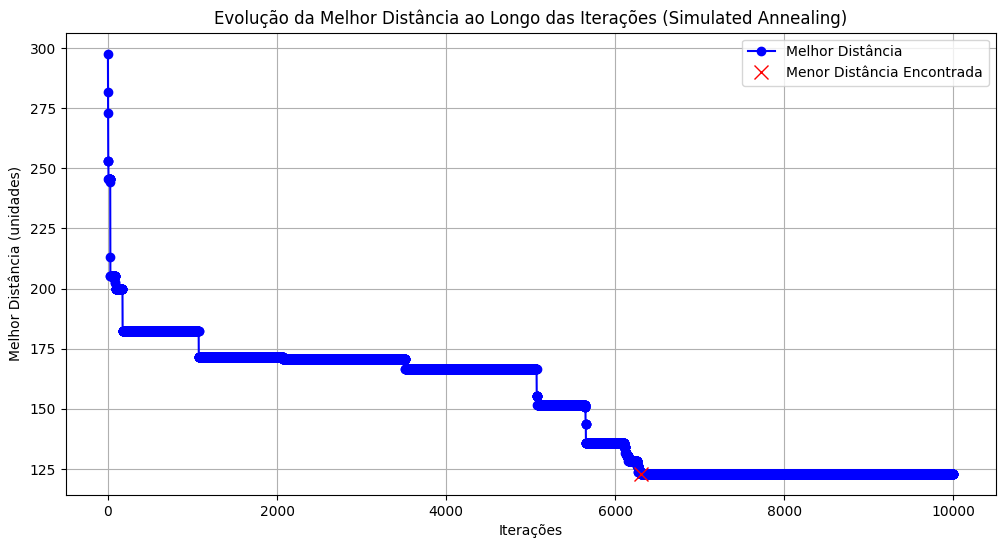

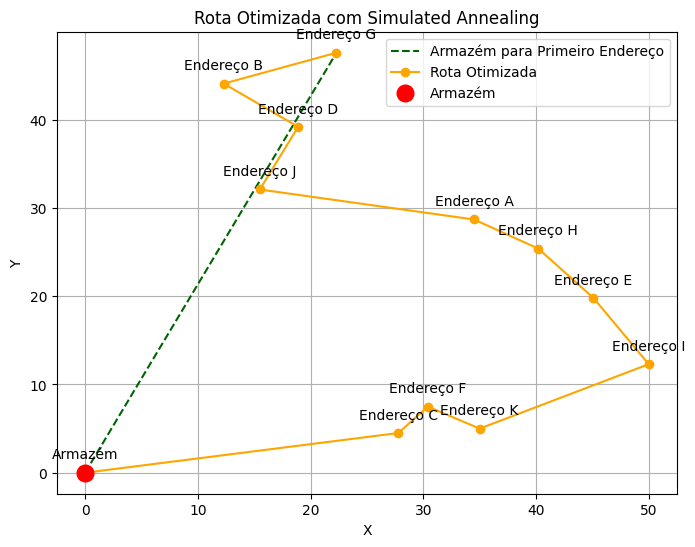

In [ ]:
#TROCAR ESSA PARTE DO CÓDIGO PARA TROCAR OS AS COORDENADAS

# Definindo os endereços como coordenadas (x, y) e seus nomes
enderecos = np.array([
           [0, 0],        # Armazém
           [34.5, 28.7],  # Endereço A
           [12.3, 44.1],  # Endereço B
           [27.8, 4.5],   # Endereço C
           [18.9, 39.2],  # Endereço D
           [45.1, 19.8],  # Endereço E
           [30.4, 7.5],   # Endereço F
           [22.3, 47.6],  # Endereço G
           [40.2, 25.4],  # Endereço H
           [50.0, 12.3],  # Endereço I
           [15.5, 32.1],  # Endereço J (nova coordenada)
           [35.0, 5.0]    # Endereço K
       ])

# Definindo os nomes dos endereços
nomes_enderecos = ['Armazém', 'Endereço A', 'Endereço B', 'Endereço C', 'Endereço D', 'Endereço E', 'Endereço F', 'Endereço G', 'Endereço H', 'Endereço I', 'Endereço J', 'Endereço K']



#__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________





# Função para calcular a distância total da rota
def calcular_distancia(rota):
    distancia = 0
    for i in range(len(rota) - 1):
        distancia += np.linalg.norm(enderecos[rota[i]] - enderecos[rota[i + 1]])
    # Adiciona a distância de volta ao armazém
    distancia += np.linalg.norm(enderecos[rota[-1]] - enderecos[0])
    return distancia

# Simulated Annealing
def simulated_annealing(initial_route, initial_temp, cooling_rate, max_iter):
    current_route = initial_route
    current_distance = calcular_distancia(current_route)
    best_route = np.copy(current_route)
    best_distance = current_distance

    temp = initial_temp
    distance_history = [current_distance]  # Para armazenar a evolução das distâncias

    for _ in range(max_iter):
        # Gera uma nova rota
        new_route = np.copy(current_route)
        # Realiza uma troca aleatória
        i, j = np.random.choice(len(new_route), 2, replace=False)
        new_route[i], new_route[j] = new_route[j], new_route[i]

        new_distance = calcular_distancia(new_route)

        # Aceita a nova rota com base na temperatura
        if (new_distance < current_distance or
            np.random.rand() < np.exp((current_distance - new_distance) / temp)):
            current_route = new_route
            current_distance = new_distance

            # Atualiza a melhor rota
            if current_distance < best_distance:
                best_route = np.copy(current_route)
                best_distance = current_distance

        # Armazena a distância atual
        distance_history.append(best_distance)

        # Resfria a temperatura
        temp *= cooling_rate

    return best_route, best_distance, distance_history

# Configurações ajustadas para Simulated Annealing
initial_route = np.random.permutation(range(1, len(enderecos)))  # Rota inicial aleatória
best_route, best_distance, distance_history = simulated_annealing(
    initial_route, initial_temp=2000, cooling_rate=0.999, max_iter=10000
)

# Exibir a melhor rota encontrada
print(f'A melhor rota encontrada: {best_route}')
print(f'A distância total: {best_distance:.2f}')

# Gráfico da evolução da melhor distância
plt.figure(figsize=(12, 6))
plt.plot(distance_history, marker='o', color='blue', label='Melhor Distância')

# Marcar a menor distância encontrada com um "X"
min_distance = min(distance_history)
min_index = distance_history.index(min_distance)
plt.plot(min_index, min_distance, 'rx', markersize=10, label='Menor Distância Encontrada')

plt.title('Evolução da Melhor Distância ao Longo das Iterações (Simulated Annealing)')
plt.xlabel('Iterações')
plt.ylabel('Melhor Distância (unidades)')
plt.grid()
plt.legend()
plt.show()

# Gráfico da rota otimizada
plt.figure(figsize=(8, 6))

# Traçar a ida do armazém ao primeiro endereço em verde escuro (tracejado)
plt.plot([enderecos[0, 0], enderecos[best_route[0], 0]], [enderecos[0, 1], enderecos[best_route[0], 1]],
         color='darkgreen', linestyle='--', label='Armazém para Primeiro Endereço')

# Traçar a rota otimizada entre os endereços (em laranja sólido)
plt.plot(enderecos[best_route, 0], enderecos[best_route, 1], marker='o', linestyle='-', color='orange', label='Rota Otimizada')

# Traçar a volta do último endereço ao armazém em laranja (sólido)
plt.plot([enderecos[best_route[-1], 0], enderecos[0, 0]], [enderecos[best_route[-1], 1], enderecos[0, 1]],
         color='orange', linestyle='-')

# Adicionar o armazém como uma bola vermelha maior
plt.plot(enderecos[0, 0], enderecos[0, 1], 'ro', markersize=12, label='Armazém')  # Aqui está a alteração

plt.title('Rota Otimizada com Simulated Annealing')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.xlim()
plt.ylim()

# Adicionando rótulos aos pontos
for i, nome in enumerate(nomes_enderecos):
    plt.annotate(nome, (enderecos[i, 0], enderecos[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Adicionando a legenda
plt.legend()

plt.show()

